In [3]:
'''
scikit-learn 中的svm
'''
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
# 只取前两个特征
X = X[y<2,:2]
y = y[y<2]

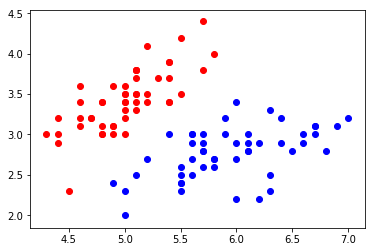

In [4]:
# y=0的红色
plt.scatter(X[y==0,0],X[y==0,1],color='red')
# y=1的蓝色
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

In [5]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
# 实例化
standardScaler = StandardScaler()
# 对X整体进行归一化
standardScaler.fit(X)
# 将X传进去，完成对X特征值的数据归一化操作
X_standard = standardScaler.transform(X)

In [6]:
# 针对线性分类的svm，可以引入sklearn中的LinearSVC
# sv为支持向量，c为分类。即svc用支持向量来进行分类
from sklearn.svm import LinearSVC
# 传入参数C：Soft Margin SVM 的C 取值越大越偏向Hard Margin svm
# C取值越大容错空间越小；C取值越小，容错空间越大
# 取一个大值
svc = LinearSVC(C=1e9)
# 拿标准化后的数据，训练一个svc模型
svc.fit(X_standard,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
'''
作图模板1：查看svc决策边界效果图，进行图形绘制
'''

'''
绘图模块
参数：
 model：训练好的model
 axis：需要绘制的区域，坐标轴的范围，对应4个元素，分别是x轴和y轴的范围
'''
import numpy as np
#将x轴、y轴划分为无数小点，最大值-最小值 再乘以 100
def plot_decision_boundary(model,axis):#绘图模块
    x0,x1 = np.meshgrid(  
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth =5,cmap=custom_cmap)

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


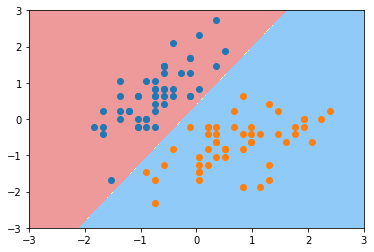

In [9]:
'''
作图模板2：查看svc决策边界效果图，进行图形绘制
'''
# 对模型svc进行绘制，指定x、y轴的范围都是-3,3
plot_decision_boundary(svc,axis=[-3,3,-3,3])
# 对原始的数据集进行绘制，注意要使用归一化后的数据
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

In [10]:
'''
把C值放小，即扩大容错空间，增加泛化能力
可见错分了一个蓝色点

# 传入参数C：Soft Margin SVM 的C 取值越大越偏向Hard Margin svm
# C取值越大容错空间越小；C取值越小，容错空间越大
'''

svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard,y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


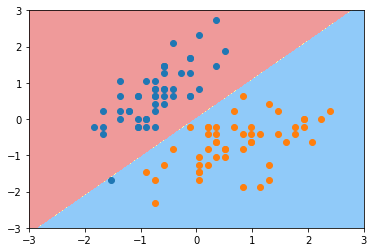

In [11]:
'''
可见错分了一个蓝色点
'''
# 对模型svc进行绘制，指定x、y轴的范围都是-3,3
plot_decision_boundary(svc2,axis=[-3,3,-3,3])
# 对原始的数据集进行绘制，注意要使用归一化后的数据
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

In [12]:
'''
svm最优化，对应的margin区间上下两条平行直线
系数值有两个，对应两个特征的系数，并且此时类别标签为二分类

系数为二维数组：sklearn封装的svm算法，可以直接处理多分类问题
'''
svc.coef_

array([[ 4.03239631, -2.50700881]])

In [13]:
'''
截距为一维数组：一条直线，对应的一个截距
'''
svc.intercept_

array([ 0.92736323])

In [14]:
'''
优化绘制svc的绘图模型，添加绘制margin区间的上下两条平行线
'''
def plot_svc_decision_boundary(model,axis):#绘图模块
    x0,x1 = np.meshgrid(  
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth =5,cmap=custom_cmap)
    
    # 添加绘制margin区间的上下两条平行线
    # 系数为二维数组对应两条直线系数list of list格式，先绘制一条，取出数组中的第一个系数
    w = model.coef_[0]
    b = model.intercept_[0]
    
    """
    决策边界对应的直线方程：
      w0*x0 + w1*x1 +b =0
      对于svc模型训练就是训练处 w0，w1，b这三个参数，即决定了决策边界
    
    改写为了方便计算机绘制，绘制直线给定x0来绘制x1： 
      x1 = -w0/w1 *x0 -b/w1
      绘制的x，plot_x,范围为axis[0]到axis[1]之间，取200个点
      x轴的参数是前两位axis[0]，axis[1]
    
    """
    plot_x = np.linspace(axis[0],axis[1],200)
    # 上边界对应的直线方程：w0*x0 + w1*x1 +b =1
    # 同样进行改写方便绘图
    up_y = -w[0]/w[1] *plot_x -b/w[1] + 1/w[1]
    # 下边界对应的直线方程：w0*x0 + w1*x1 +b =-1
    down_y = -w[0]/w[1] *plot_x -b/w[1] - 1/w[1]
    """
    然后分别将plot_x与up_y,plot_x与down_y用折线图表示出来
    限制up_y与down_y的范围，要同样落在axis参数范围中：axis[0],axis[1]中
    y轴的参数是后两位axis[3]，axis[4]
    """
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index],up_y[up_index],color='black')
    plt.plot(plot_x[down_index],down_y[down_index],color='black')

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


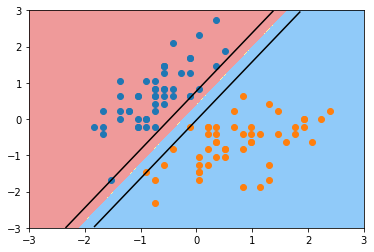

In [15]:
'''
第一种的 hard margin SVM作图
'''
# 对模型svc进行绘制，指定x、y轴的范围都是-3,3
plot_svc_decision_boundary(svc,axis=[-3,3,-3,3])
# 对原始的数据集进行绘制，注意要使用归一化后的数据
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


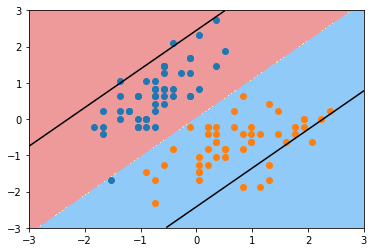

In [16]:
'''
第二种的 soft margin SVM作图
'''
# 对模型svc进行绘制，指定x、y轴的范围都是-3,3
plot_svc_decision_boundary(svc2,axis=[-3,3,-3,3])
# 对原始的数据集进行绘制，注意要使用归一化后的数据
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

# SVM中使用多项式特征

In [20]:
from sklearn import datasets

#引入moons数据集
X,y=datasets.make_moons()

In [18]:
X.shape

(100, 2)

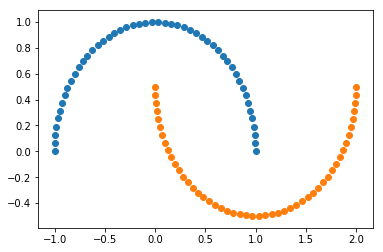

In [21]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [22]:
# 对规则数据集，添加一定的噪音
# 增大标准差0.15
X,y=datasets.make_moons(noise=0.15,random_state=666)

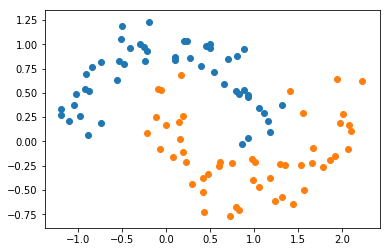

In [23]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### 使用多项式特征的svm

In [25]:
# 预处理模块引入PolynomialFeatures多项式特征类，和数据标准化类
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
# 使用svc类
from sklearn.svm import LinearSVC
# 以上几步顺序执行，方便执行步骤，引入Pipeline管道
from sklearn.pipeline import Pipeline
# 使用多项式特征，需要定义阶数degree
'''
degree控制多项式最高次数
degree取值20的情况下
会出现过拟合，多项式的阶数如果越大，模型会越复杂，
如图外围会出现其他边界
防止过拟合：
1.简化模型，减小阶数degree
2.对模型进行正则化
'''
def PolynomialSVC(degree,C=1.0):
    # 直接returnPipeline实例对象
    # 在Pipeline数组中传入3个步骤
    return Pipeline([
        # 1.对传入的数据，生成多项式特征，先对数据转化为高维有多项式项
        ('poly',PolynomialFeatures(degree = degree)),
        # 2.数据标准化过程
        ('std_scaler',StandardScaler()),
        # 3.调用svmsuanfa
        ('linearSVC',LinearSVC(C=C))
        
    ])

In [26]:
poly_svc = PolynomialSVC(degree=3)

In [27]:
poly_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [28]:
poly_svc.score(X,y)

0.95999999999999996

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


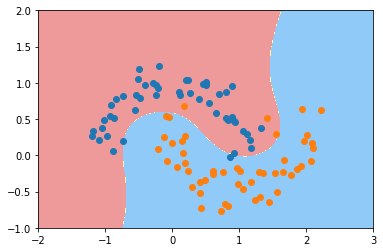

In [35]:
'''
作图模板1：查看svc决策边界效果图，进行图形绘制
'''

'''
绘图模块
参数：
 model：训练好的model
 axis：需要绘制的区域，坐标轴的范围，对应4个元素，分别是x轴和y轴的范围
'''
import numpy as np
#将x轴、y轴划分为无数小点，最大值-最小值 再乘以 100
def plot_decision_boundary(model,axis):#绘图模块
    x0,x1 = np.meshgrid(  
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth =5,cmap=custom_cmap)
    

'''
'''
# 对模型svc进行绘制，指定x、y轴的范围都是-3,3
plot_decision_boundary(poly_svc,axis=[-2,3,-1,2])
# 对原始的数据集进行绘制，注意要使用归一化后的数据
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

# 多项式核对应的svm

In [36]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree,C=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        # svm会自动对传入的数据进行多项式化，不同于上面先多项式化，再用linearSVC
        ('kernelSVC',SVC(kernel='poly',degree=degree,C=C))
    ])

In [41]:
'''
degree控制多项式最高次数
'''
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


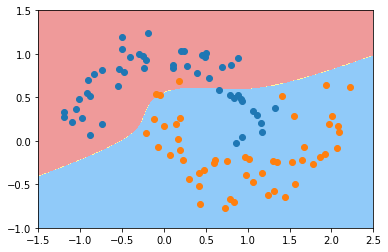

'\n非线性的决策边界\n'

In [42]:
plot_decision_boundary(poly_kernel_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
'''
非线性的决策边界
'''

# 高斯核函数

In [43]:
# 预处理模块引入数据标准化类
from sklearn.preprocessing import StandardScaler
# 使用svc类
from sklearn.svm import SVC
# 以上几步顺序执行，方便执行步骤，引入Pipeline管道
from sklearn.pipeline import Pipeline


def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        # rbf 高斯核函数
        ('svc',SVC(kernel='rbf',gamma=gamma))
    ])

In [44]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


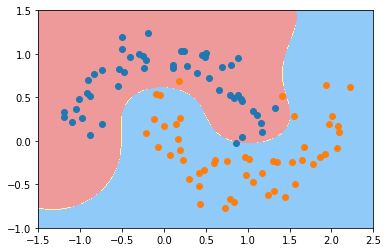

'\n非线性的决策边界\n'

In [46]:
plot_decision_boundary(svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
'''
使用高斯核函数，gamma=1.0时的分类效果
'''

In [47]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


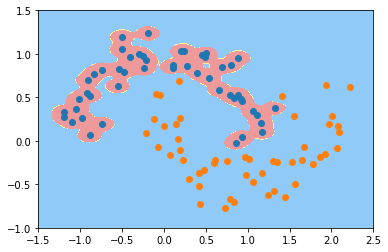

'\n使用高斯核函数，gamma=100时的分类效果\ngamma取值越大，正太分布钟形图案越窄\n'

In [49]:
plot_decision_boundary(svc_gamma100,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
'''
使用高斯核函数，gamma=100时的分类效果
gamma取值越大，正太分布钟形图案越窄，过拟合
RBFKernelSVC，俯视钟形图案，蓝色每个点都是钟形图案的尖
'''

In [50]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


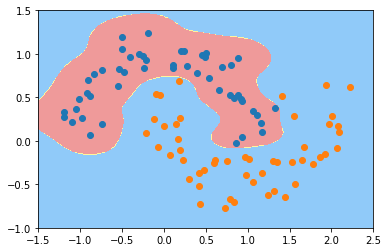

'\n使用高斯核函数，gamma=100时的分类效果\ngamma取值越大，正太分布钟形图案越窄，过拟合\nRBFKernelSVC，俯视钟形图案，蓝色每个点都是钟形图案的尖\n'

In [51]:
plot_decision_boundary(svc_gamma10,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
'''
使用高斯核函数，gamma=10时的分类效果
gamma取值越大，正太分布钟形图案越窄，过拟合
RBFKernelSVC，俯视钟形图案，蓝色每个点都是钟形图案的尖
'''

In [54]:
svc_gamma05 = RBFKernelSVC(gamma=0.1)
svc_gamma05.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


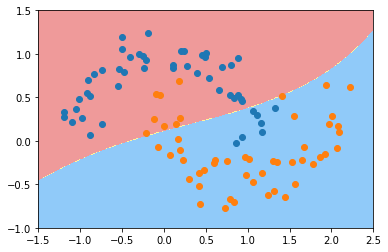

'\n使用高斯核函数，gamma=10时的分类效果\ngamma取值越大，正太分布钟形图案越窄，过拟合\nRBFKernelSVC，俯视钟形图案，蓝色每个点都是钟形图案的尖\n'

In [55]:
plot_decision_boundary(svc_gamma05,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
'''
使用高斯核函数，gamma=0.1时的分类效果
gamma取值越小，正太分布钟形图案越宽，欠拟合
RBFKernelSVC，俯视钟形图案，蓝色每个点都是钟形图案的尖
'''

In [ ]:
'''
超参数gamma
gamma非常大：过拟合，对训练数据太敏感，泛化能力低
gamma非常小：欠拟合，接近于线性划分
'''

# SVM解决回归问题

In [56]:
from sklearn import datasets

'''
解决回归问题，引入Boston房间数据集
'''
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [58]:
from sklearn.model_selection import train_test_split
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [59]:
# Linear 线性
# SVR support vector Regression回归
# SVC support vector Classify 分类
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        # 省去另外一个C超参数，使用默认值
        ('linearSVR',LinearSVR(epsilon=epsilon))
    ])

In [60]:
# 实例化一个svr模型
svr = StandardLinearSVR()
# fit进行模型训练
svr.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [61]:
svr.score(X_test,y_test)
'''
效果不太好，如果使用高斯kernel可以调节gamma超参数
'''

0.63577797802238767